In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/my-data/train_Arabic_tweets_positive_20190413.tsv
/kaggle/input/my-data/train_Arabic_tweets_negative_20190413.tsv
/kaggle/input/my-data/test_Arabic_tweets_positive_20190413.tsv
/kaggle/input/my-data/test_Arabic_tweets_negative_20190413.tsv
/kaggle/input/my-data/newsfeed.csv


In [2]:
!pip install transformers==4.37.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 80.1 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.39.3
    Uninstalling transformers-4.39.3:
      Successfully uninstalled transformers-4.39.3


In [3]:
!pip install tensorflow==2.15.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 67.1 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: keras
    Found existing installation: keras 3.2.1
    Uninstalling keras-3.2.1:
      Successfully uninstalled keras-3.2.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


In [4]:
!python -c "import tensorflow as tf; print(tf.__version__)"

2024-06-10 09:31:07.078104: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-10 09:31:07.078159: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-10 09:31:07.079840: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2.15.1


In [5]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 66.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 41.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 25.6 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.41.3-py3-none-any.whl size=25316959 sha256=ec9e11d5e064cafac6405cf2172e02e0784846005110e68ca6e86cac388ca7a6
  Stored in directory: /roo

In [6]:
#Checking for GPU
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))
    !nvidia-smi

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB
Mon Jun 10 09:32:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0              25W / 250W |      2MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/

In [7]:
# Generic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings, gc
warnings.filterwarnings("ignore")

# ktrain
import ktrain
from ktrain import text

# sklearn
from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_csv('/kaggle/input/my-data/newsfeed.csv',usecols=['Body','category'])
df.sample(10)

,category,Body
3403,World,محكم اسبان نظر تهام اسراءيل ارتكاب جراءم انسان...
899,Entertainment,مدونات جور صيف بحر برقعكين المصر زايغه مدونات ...
6687,Sport,رياض ماذ ساصوت مايكل يسيا ابراهيم سا كتب اسباب...
4775,Middle East News,اوسط واب حزب المجتمع الديمقراطي كرد قاطع برلم ...
6390,Business,قتصاد عمال اقتصاد روس ينكمش نسب مءه الرءيس روس...
4792,Middle East News,اوسط نديد تجربه صاروخيه ايرانيه توال ردود افعا...
1197,Middle East News,قتيل جريح معار صومال اشنطن منزعجه قتيل جريح مع...
4005,Middle East News,اوسط معارضه ايرانيه دعو اطلاق سراح معتقل قاد م...
3389,World,دن حقق تهام استخبار تعذيب سجناء خارج ريطانيا د...
5480,World,عالم رءيس ارمين زيار تاريخ ركي الرءيس ارمين رج...


In [9]:
X = df['Body']
y = df['category']
X_train, X_test , y_train,y_test = train_test_split(np.array(X),np.array(y),test_size=0.2, random_state=0,stratify=y)
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (7027,)
Shape of y_train: (7027,)
Shape of X_test: (1757,)
Shape of y_test: (1757,)


In [10]:
MODEL_NAME = 'aubmindlab/bert-base-arabertv01'

In [11]:
t = text.Transformer(MODEL_NAME, maxlen=128)
train = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

config.json:   0%|          | 0.00/576 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

preprocessing train...
language: ar
train sequence lengths:
	mean : 256
	95percentile : 567
	99percentile : 834


tokenizer_config.json:   0%|          | 0.00/379 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/780k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.70M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: ar
test sequence lengths:
	mean : 250
	95percentile : 531
	99percentile : 795


In [12]:
model = t.get_classifier(metrics=['accuracy'])
learner = ktrain.get_learner(model, train_data=train, val_data=val, batch_size=32)
learner.fit_onecycle(5e-5,10)



begin training using onecycle policy with max lr of 5e-05...
Epoch 1/10
220/220 [==============================] - 142s 533ms/step - loss: 0.7957 - accuracy: 0.7601 - val_loss: 0.2661 - val_accuracy: 0.9197
Epoch 2/10
220/220 [==============================] - 113s 514ms/step - loss: 0.2039 - accuracy: 0.9444 - val_loss: 0.2168 - val_accuracy: 0.9328
Epoch 3/10
220/220 [==============================] - 113s 513ms/step - loss: 0.1482 - accuracy: 0.9590 - val_loss: 0.1933 - val_accuracy: 0.9397
Epoch 4/10
220/220 [==============================] - 113s 514ms/step - loss: 0.0985 - accuracy: 0.9728 - val_loss: 0.2174 - val_accuracy: 0.9363
Epoch 5/10
220/220 [==============================] - 113s 514ms/step - loss: 0.0932 - accuracy: 0.9748 - val_loss: 0.2119 - val_accuracy: 0.9391
Epoch 6/10
220/220 [==============================] - 113s 514ms/step - loss: 0.0892 - accuracy: 0.9754 - val_loss: 0.2312 - val_accuracy: 0.9380
Epoch 7/10
220/220 [==============================] - 113s 51

In [13]:
validation = learner.validate(class_names=t.get_classes())
validation

55/55 [==============================] - 12s 168ms/step
                        precision    recall  f1-score   support

              Business       0.96      0.95      0.96       347
         Entertainment       0.86      0.83      0.84       153
      Middle East News       0.98      0.95      0.96       402
Science and Technology       0.90      0.93      0.91       272
                 Sport       0.98      0.99      0.99       182
                 World       0.95      0.98      0.96       401

              accuracy                           0.95      1757
             macro avg       0.94      0.94      0.94      1757
          weighted avg       0.95      0.95      0.95      1757



array([[329,   8,   1,   8,   0,   1],
       [  3, 127,   2,  17,   1,   3],
       [  2,   1, 383,   2,   2,  12],
       [  7,   8,   2, 252,   0,   3],
       [  0,   1,   0,   0, 180,   1],
       [  0,   3,   4,   2,   0, 392]])

In [14]:
validation[:]

array([[329,   8,   1,   8,   0,   1],
       [  3, 127,   2,  17,   1,   3],
       [  2,   1, 383,   2,   2,  12],
       [  7,   8,   2, 252,   0,   3],
       [  0,   1,   0,   0, 180,   1],
       [  0,   3,   4,   2,   0, 392]])

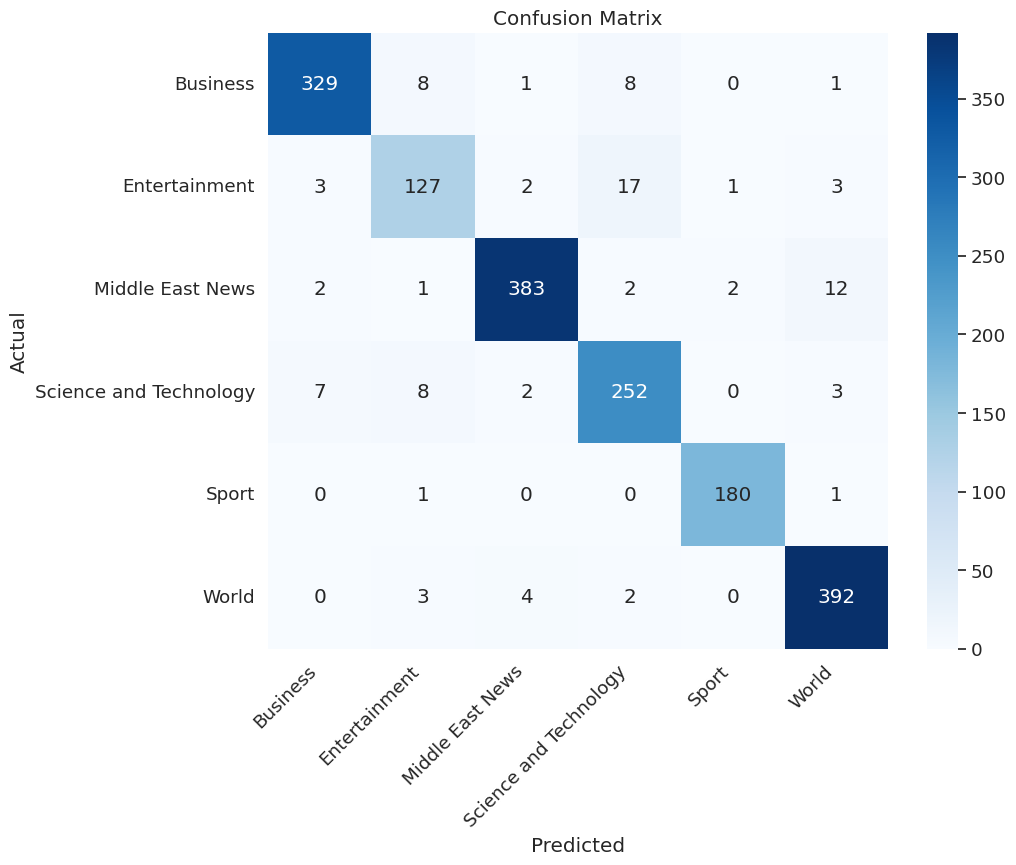

In [15]:
# Class names
class_names = df.category.unique()

# Plotting confusion matrix
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Adjust font scale if needed
sns.heatmap(validation[:], annot=True, cmap='Blues', fmt='g',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# Test the Model for Sentiment Analysis

## Installing the Libraries

In [16]:
!pip install Arabic-Stopwords

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 7.8 MB/s eta 0:00:00


In [17]:
!pip install nltk PyArabic Tashaphyne

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.5/251.5 kB 6.8 MB/s eta 0:00:00


In [18]:
import string
import re
import regex
import nltk
from nltk.corpus import stopwords # Stopwords
import arabicstopwords.arabicstopwords as stp #more of arabic stop words
from nltk.stem.isri import ISRIStemmer
import pyarabic.araby as araby
from tashaphyne.stemming import ArabicLightStemmer

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
train_neg = pd.read_csv("/kaggle/input/my-data/train_Arabic_tweets_negative_20190413.tsv", sep="\t", header=None)
train_neg.rename(columns={0:'label', 1:'tweet'}, inplace=True)
train_neg['label'] = 0

train_pos = pd.read_csv("/kaggle/input/my-data/train_Arabic_tweets_positive_20190413.tsv", sep="\t", header=None)
train_pos.rename(columns={0:'label', 1:'tweet'}, inplace=True)
train_pos['label'] = 1


train_df = pd.concat([train_neg, train_pos], axis=0).reset_index(drop=True)

In [21]:
test_pos = pd.read_csv("/kaggle/input/my-data/test_Arabic_tweets_positive_20190413.tsv", sep="\t", header=None)
test_pos.rename(columns={0:'label', 1:'tweet'}, inplace=True)
test_pos['label']=1

test_neg = pd.read_csv("/kaggle/input/my-data/test_Arabic_tweets_positive_20190413.tsv", sep="\t", header=None)
test_neg.rename(columns={0:'label', 1:'tweet'}, inplace=True)
test_neg['label']=0

test_df = pd.concat([test_neg, test_pos], axis=0).reset_index(drop=True)

In [22]:
arabic_stopwords = stopwords.words("arabic")

# Preprocessing The test Set and Cleaning

In [23]:
def Arabic_Light_Stemmer(text):
    #making an object
    Arabic_Stemmer = ArabicLightStemmer()

    #stemming each word
    text=[Arabic_Stemmer.light_stem(y) for y in text.split()]

    return " " .join(text)

def normalizeArabic(text):
    text = text.strip()
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)

    #remove repetetions
    text = re.sub("[إأٱآا]", "ا", text)
    text = text.replace('وو', 'و')
    text = text.replace('يي', 'ي')
    text = text.replace('ييي', 'ي')
    text = text.replace('اا', 'ا')

    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)

    # Remove longation
    text = re.sub(r'(.)\1+', r"\1\1", text)

    #Strip vowels from a text, include Shadda.
    text = araby.strip_tashkeel(text)

    #Strip diacritics from a text, include harakats and small lettres The striped marks are
    text = araby.strip_diacritics(text)
    text=''.join([i for i in text if not i.isdigit()])
    return text

def Removing_non_arabic(text):
    text = re.sub('[A-Za-z]+',' ',text)
    return text

def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def Removing_punctuations(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )

    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

def remove_extra_Space(text):
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    return  " ".join(text.split())

def remove_hashtages_and_mentions(text):
    text = re.sub("@[A-Za-z0-9_]+","", text)
    text = re.sub("#[A-Za-z0-9_]+","", text)
    return text

def replace_random_text(text):
    text = text.replace('\u202c', '')
    text = text.replace('\u202e', '')
    text = text.replace('\u202d', '')
    return text

def remove_stopwords_robustly(text):
    # Split the text into words
    words = text.split()

    # Remove stop words
    filtered_words = [word for word in words if word not in stp.stopwords_list()]

    # Join the filtered words back into a string
    filtered_text = ' '.join(filtered_words)

    return filtered_text

def remove_stop_words(text):
    Text=[i for i in str(text).split() if i not in arabic_stopwords]
    return " ".join(Text)

In [24]:
train_df.sample(12)

,label,tweet
28084,1,ملاكمة قرود في تايلاند 😂
14848,0,تخيلوا يسويها جوليانو وحمدلله اليوم وتضيع جلطه...
20071,0,تلاتين سنة بترقص .. الليلة رقصتنا أنا ببكي 😭 د...
21152,0,صوتي رايح فيها 💔
3248,0,جزائريون ضد التطبيع من مسيرات جمعة البارحة معا...
36696,1,ﺍﻟﻠﻬﻢ في هذا الصباح ﺍجعل لنا ﻧﺼﻴﺒﺎ ﻓﻲ ﻛﻞ ﺧﻴﺮ ﺗ...
19263,0,ماعايزين بيان لأننا ماعايزين العسكر 😤 عايزين ح...
36498,1,لا يوجد في الحيآة إكتفاء .. ولكن ﯾوجد رضا وقنا...
23867,1,🎥 من قلب الجوهرة : الجماهير الهلالية وتفاعلها ...
10157,0,يب بالضبط 😭


In [25]:
def preprocess_text(text):
    text = normalizeArabic(text)
    text = Removing_non_arabic(text)
    text = Removing_numbers(text)
    text = Removing_punctuations(text)
    text = remove_extra_Space(text)
    text = remove_hashtages_and_mentions(text)
    text = remove_stop_words(text)
    text = Arabic_Light_Stemmer(text)
    return text

In [26]:
train_df['tweet'] = train_df['tweet'].apply(preprocess_text)

In [27]:
train_df.sample(12)

,label,tweet
8396,0,عنجد مال 😟
28423,1,اشرق شمس وم جديد 🌼 لهم جعل سعد خلق قرب عباد يك...
35346,1,ديوث اك شرقيه 🍆
12969,0,صحاب ويتر ده دل تقوليلو زوج قر عين 😡
40806,1,كوب شكل موبايل 😎
25682,1,اي نجاز ستحق نو فرح يهو لكن نتظار فرح حقيق احت...
28402,1,سال له ان شفي عافي رغم نصراو لا نه اعب عجب 💛
1248,0,عال مساء 🔥🔥 تق شر انث ذا 🌚
13304,0,عروس تحب ال 🤣 سيار عرس اردن تم زي يس 😱
5630,0,📌 فا ترك اتحاد بطول قاريه ترك قضاي دوليه ترك م...


In [28]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [29]:
train_df['tweet'] = train_df['tweet'].apply(preprocess_text)

In [30]:
train_df['tweet'] = train_df['tweet'].apply(remove_emojis)

In [31]:
train_df.sample(10)

,label,tweet
36651,1,جمل ان هد روح رتق جمل ان سك طمءن ذكر ذكر تط…
30547,1,تح با يءذيڪ حرم ال حت ڪان طارق شخص حب ول
15575,0,يارب طول رمض جو جذ
35783,1,خير
16955,0,سير خط ثاب عرف خف ني متكء ثقل على دعاء ني متكل...
1669,0,كل نحيف رشاقه متابع دور خلال مد ورس خبراء غ...
23810,1,وم ساع ظهر وق
6693,0,سعد
15471,0,زي دا خوف جد دا رب تل عز ناس وي يارب متبتليش ...
36449,1,علاق ول ان حس علاق كو سعيد حس علاق شخص سعيد جذ...


In [32]:
mapping = {
    0: "negative",
    1: "positive",
}
train_df['label'] = train_df['label'].map(mapping)
train_df.label.unique()

array(['negative', 'positive'], dtype=object)

In [33]:
X = train_df['tweet']
y = train_df['label']
X_train, X_test , y_train,y_test = train_test_split(np.array(X),np.array(y),test_size=0.2, random_state=0,stratify=y)
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (36220,)
Shape of y_train: (36220,)
Shape of X_test: (9055,)
Shape of y_test: (9055,)


In [34]:
t = text.Transformer(MODEL_NAME, maxlen=128)
train = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: ar
train sequence lengths:
	mean : 9
	95percentile : 17
	99percentile : 19


Is Multi-Label? False
preprocessing test...
language: ar
test sequence lengths:
	mean : 9
	95percentile : 17
	99percentile : 19


In [35]:
model = t.get_classifier(metrics=['accuracy'])
learner = ktrain.get_learner(model, train_data=train, val_data=val, batch_size=32)
learner.fit_onecycle(1e-5,10)



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/10
1132/1132 [==============================] - 612s 518ms/step - loss: 0.6121 - accuracy: 0.6538 - val_loss: 0.5491 - val_accuracy: 0.7136
Epoch 2/10
1132/1132 [==============================] - 583s 515ms/step - loss: 0.5223 - accuracy: 0.7311 - val_loss: 0.5047 - val_accuracy: 0.7421
Epoch 3/10
1132/1132 [==============================] - 582s 515ms/step - loss: 0.4564 - accuracy: 0.7734 - val_loss: 0.4775 - val_accuracy: 0.7621
Epoch 4/10
1132/1132 [==============================] - 582s 515ms/step - loss: 0.3994 - accuracy: 0.8108 - val_loss: 0.4844 - val_accuracy: 0.7691
Epoch 5/10
1132/1132 [==============================] - 583s 515ms/step - loss: 0.3372 - accuracy: 0.8431 - val_loss: 0.4906 - val_accuracy: 0.7706
Epoch 6/10
1132/1132 [==============================] - 583s 515ms/step - loss: 0.2760 - accuracy: 0.8756 - val_loss: 0.5446 - val_accuracy: 0.7729
Epoch 7/10
1132/1132 [===========================

In [36]:
validation_test_df = learner.validate(class_names=t.get_classes())
validation_test_df

283/283 [==============================] - 49s 162ms/step
              precision    recall  f1-score   support

    negative       0.77      0.78      0.77      4503
    positive       0.78      0.77      0.77      4552

    accuracy                           0.77      9055
   macro avg       0.77      0.77      0.77      9055
weighted avg       0.77      0.77      0.77      9055



array([[3514,  989],
       [1061, 3491]])